In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tld import get_tld
from urllib.parse import urlparse
import re
import seaborn as sns

In [5]:
url_data = pd.read_csv('./malicious.csv')
url_data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


# Dataset Information

In [6]:
print("Shape of dataset: ", url_data.shape, "\n")
url_data.info()
print("\nTotal no. of Null Values: \n", url_data.isnull().sum())

Shape of dataset:  (651191, 2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB

Total no. of Null Values: 
 url     0
type    0
dtype: int64


# Labelling Dataset
- LabelEncoding 'Type' column

In [7]:
labelEncoder = LabelEncoder()
url_data['label'] = labelEncoder.fit_transform(url_data['type'])
url_data.head()

,url,type,label
0,br-icloud.com.br,phishing,3
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1


# Data Preprocessing
- Top-Level-Domain
- Length Features
- Count Features
- Binary Features

## Top-Level-Domain
##### Extract TLD

In [8]:
def custom_get_tld(url: str):
    tld = get_tld(url, fail_silently=True)
    return tld if tld else ''

url_data['tld'] = url_data['url'].apply(lambda url: custom_get_tld(url))
url_data.head()

,url,type,label,tld
0,br-icloud.com.br,phishing,3,
1,mp3raid.com/music/krizz_kaliko.html,benign,0,
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,net


##### Label Encoding TLD column

In [9]:
tldEncoder = LabelEncoder()
url_data['tld_vector'] = tldEncoder.fit_transform(url_data['tld'])
url_data.head()

,url,type,label,tld,tld_vector
0,br-icloud.com.br,phishing,3,,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,be,35
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,net,353


## Length Features
- Length of TLD
- Length of URL 
- Length of HostName
- Length of Path
- Length of First Directory

##### Length of Top-Level-Domain

In [10]:
url_data['tld_len'] = url_data['tld'].apply(lambda tld: len(tld))

In [11]:
# Dropping TLD column
url_data.drop(["tld"], axis = 1, inplace=True)

##### Length of URL

In [12]:
url_data['url_len'] = url_data['url'].apply(lambda url: len(str(url)))

##### Length of Hostname

In [13]:
url_data['host_len'] = url_data['url'].apply(lambda url: len(urlparse(url).netloc))

##### Length of Path

In [14]:
url_data['path_len'] = url_data['url'].apply(lambda url: len(urlparse(url).path))

##### Length of First Directory

In [15]:
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

url_data['fd_len'] = url_data['url'].apply(lambda url: fd_length(url))

In [16]:
url_data.head()

,url,type,label,tld_vector,tld_len,url_len,host_len,path_len,fd_len
0,br-icloud.com.br,phishing,3,0,0,16,0,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,35,0,35,5
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,31,0,31,7
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,35,2,88,21,10,9
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,353,3,235,23,10,9


## Count Features
- Count of 'www'
- Count of 'https'
- Number of directories
- Count of Digits
- count of Letters
- Count of Special Characters ('$&+_:=?@-.!<>#%^~')


##### Count 'www' &amp; 'https'

In [17]:
url_data['www_count'] = url_data['url'].apply(lambda url: url.count('www'))
url_data['http_count'] = url_data['url'].apply(lambda url: url.count('http'))

##### Number of Directories

In [15]:
def count_dir(url):
    return urlparse(url).path.count('/')

url_data['dir_count']= url_data['url'].apply(lambda url: count_dir(url))

##### Count Letters

In [16]:
def countLetters(url: str):
    c = 0
    for i in url:
        if i.isalpha(): c=c+1
    return c

url_data['letters_count'] = url_data['url'].apply(lambda url: countLetters(url))

##### Count Digits

In [17]:
def countDigits(url: str):
    c = 0
    for i in url:
        if i.isnumeric(): c=c+1
    return c

url_data['digits_count'] = url_data['url'].apply(lambda url: countDigits(url))

##### Count Special Characters ($&+_:=?@-.!<>#%^~)

In [18]:
def countSpclChars(url: str, charset: str):
    c = 0
    for i in url:
        if i in charset: c = c+1
    return c

url_data['spec_chars_count'] = url_data['url'].apply(lambda url: countSpclChars(url, '$&+_:=?@-.!<>#%^~'))

##### Count Specific Special Characters('&.?-') each in the url

In [19]:
url_data['count&'] = url_data['url'].apply(lambda url: url.count('&'))
url_data['count.'] = url_data['url'].apply(lambda url: url.count('.'))
url_data['count?'] = url_data['url'].apply(lambda url: url.count('?'))
url_data['count-'] = url_data['url'].apply(lambda url: url.count('-'))

In [20]:
url_data.head()

,url,type,label,tld_vector,tld_len,url_len,host_len,path_len,fd_len,www_count,http_count,dir_count,letters_count,digits_count,spec_chars_count,count&,count.,count?,count-
0,br-icloud.com.br,phishing,3,0,0,16,0,16,0,0,0,0,13,0,3,0,2,0,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,35,0,35,5,0,0,2,29,1,3,0,2,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,31,0,31,7,0,0,3,25,1,2,0,2,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,35,2,88,21,10,9,1,1,1,63,7,15,3,3,1,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,353,3,235,23,10,9,0,1,1,199,22,11,2,2,1,1


## Binary Features
- url domain is ip address or not

In [21]:
def isIP(url: str):
    match = re.match('^((25[0-5]|(2[0-4]|1\d|[1-9]|)\d)(\.(?!$)|$)){4}$', url)
    return 1 if match else 0

url_data['is_ip'] = url_data['url'].apply(lambda url: isIP(str(urlparse(url).hostname)))

In [22]:
url_data.head(5)

,url,type,label,tld_vector,tld_len,url_len,host_len,path_len,fd_len,www_count,http_count,dir_count,letters_count,digits_count,spec_chars_count,count&,count.,count?,count-,is_ip
0,br-icloud.com.br,phishing,3,0,0,16,0,16,0,0,0,0,13,0,3,0,2,0,1,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,35,0,35,5,0,0,2,29,1,3,0,2,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,31,0,31,7,0,0,3,25,1,2,0,2,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,35,2,88,21,10,9,1,1,1,63,7,15,3,3,1,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,353,3,235,23,10,9,0,1,1,199,22,11,2,2,1,1,0


# Data Visualization

##### Bar chart: Type of URLs vs Number of URLs

[]

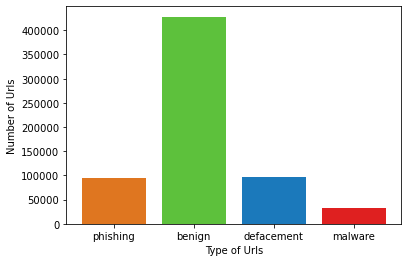

In [19]:
red_color = '#ff0000'
orange_color = '#ff7300'
green_color = '#52d726'
blue_color = '#007ed6'
color_list = [orange_color, green_color, blue_color, red_color]

sns.countplot(x='type', data=url_data, palette=color_list)
plt.xlabel('Type of Urls')
plt.ylabel('Number of Urls')
plt.plot()

##### Pie chart: Type of URLs

[]

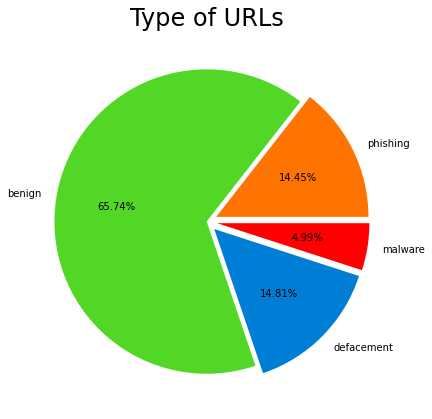

In [24]:
type_list = url_data['type'].unique()
num_of_type = [len(url_data[url_data['type'] == type]) for type in type_list]

plt.figure(figsize=(7,7), facecolor='#ffffff')
plt.pie(num_of_type, labels=type_list, colors=color_list, autopct='%0.2f%%', explode=(0.07, 0, 0.07, 0.07))
plt.title('Type of URLs', fontdict={'color': '#000000', 'size': 24})
plt.plot()

##### URL length vs Number of URL histogram

[]

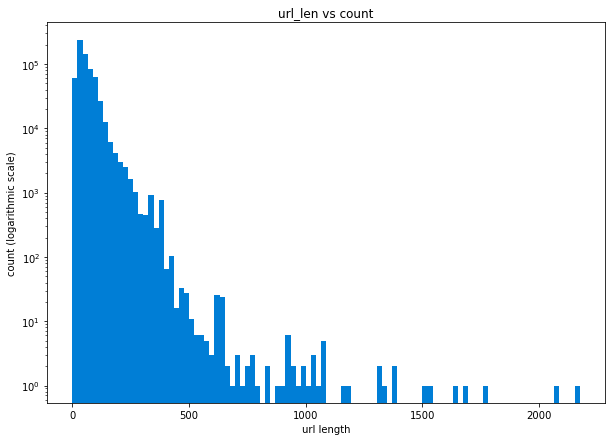

In [25]:
plt.figure(figsize=(10,7))
plt.hist(url_data['url_len'], color=blue_color, bins=100)

plt.title('url_len vs count')
plt.xlabel('url length')
plt.ylabel('count (logarithmic scale)')
plt.yscale('log')
plt.plot()

##### Http-count vs Number of URL histogram

[]

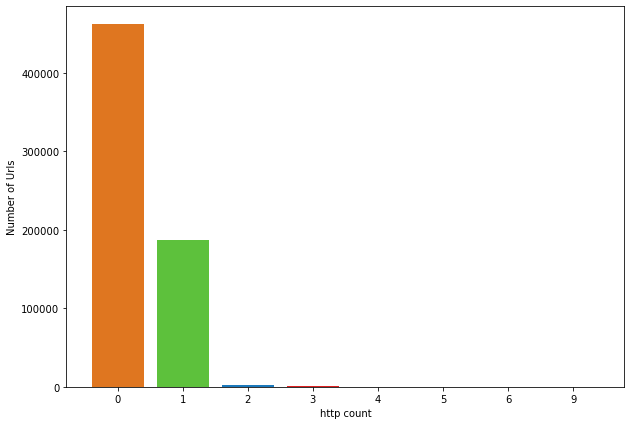

In [26]:
plt.figure(figsize=(10,7))
sns.countplot(x='http_count', data=url_data, palette=color_list)
plt.xlabel('http count')
plt.ylabel('Number of Urls')
plt.plot()

##### Directory-count vs Number of URL histogram

[]

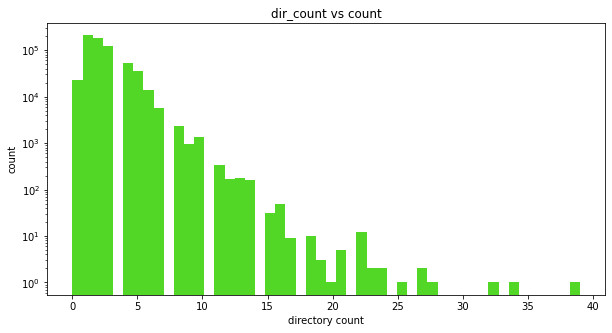

In [26]:
plt.figure(figsize=(10,5))
plt.hist(url_data['dir_count'], color=green_color, bins=50)

plt.title('dir_count vs count')
plt.xlabel('directory count')
plt.ylabel('count')
plt.yscale('log')
plt.plot()

##### IP or not vs Number of URLs

[]

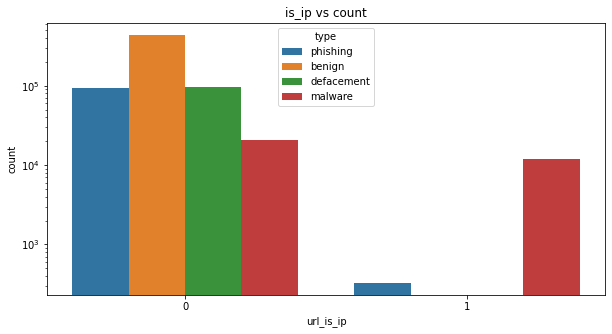

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'is_ip', data=url_data, hue='type')

plt.title('is_ip vs count')
plt.xlabel('url_is_ip')
plt.ylabel('count')
plt.yscale('log')
plt.plot()

## Heat map of correlation matrix

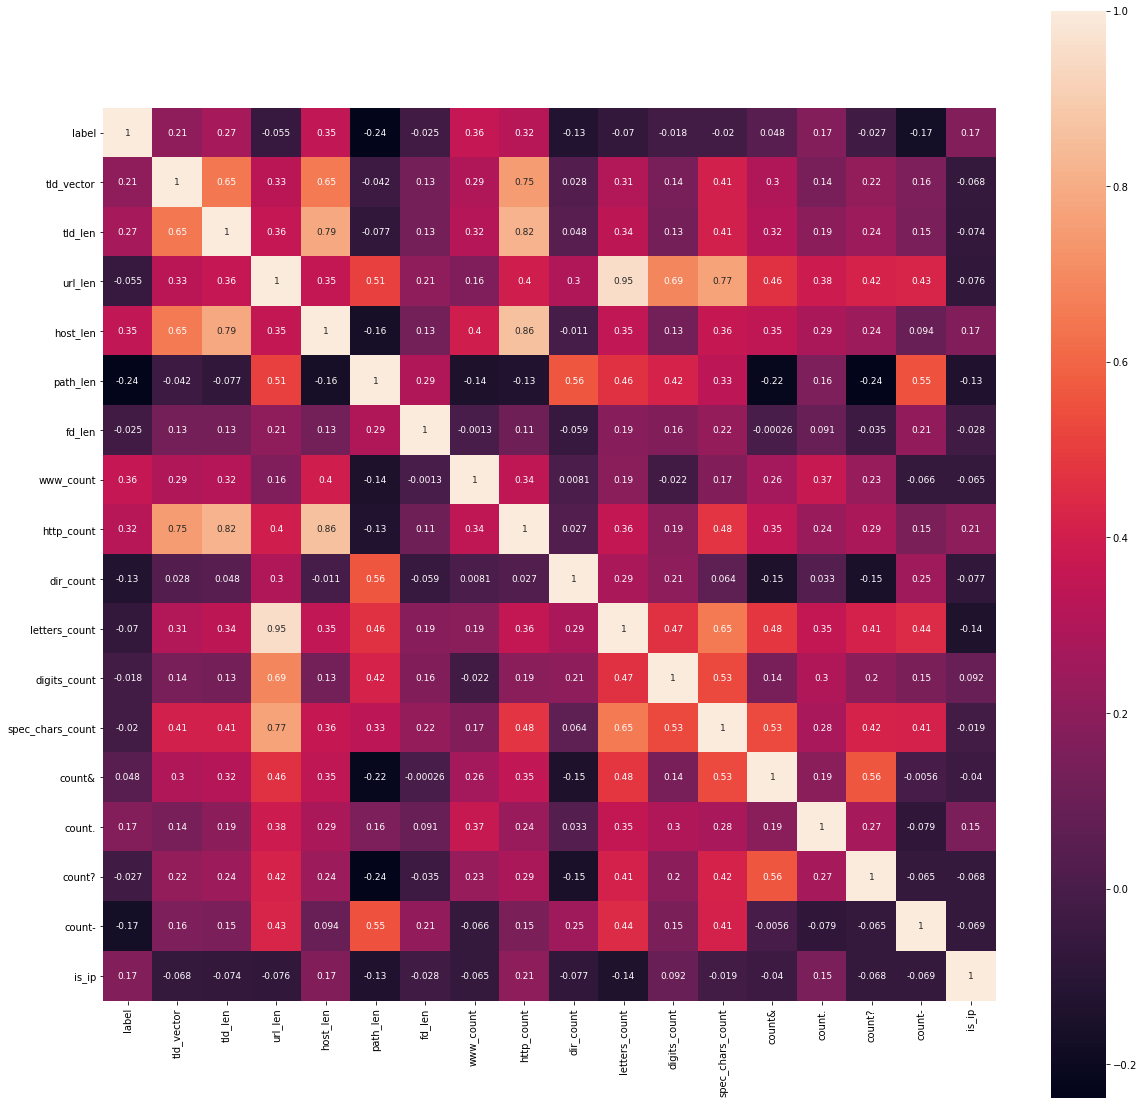

In [28]:
corr_matrix = url_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, square=True, annot=True, annot_kws={'size': 9})
plt.show()

### Mutual Information of Features vs Label

##### Calculating Mutual Information

In [29]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(url_data.iloc[:, 3:], url_data['label'])
mutual_info

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = url_data.iloc[:, 3:].columns
mutual_info = mutual_info.sort_values(ascending = False)
print(mutual_info)

host_len            0.392921
tld_vector          0.367340
http_count          0.327500
tld_len             0.310882
path_len            0.225723
www_count           0.180750
fd_len              0.175872
count.              0.150466
spec_chars_count    0.133266
dir_count           0.114061
letters_count       0.110772
url_len             0.106952
count&              0.102485
digits_count        0.083411
count?              0.064494
is_ip               0.056985
count-              0.034541
dtype: float64


##### Mutual Information Bar Chart

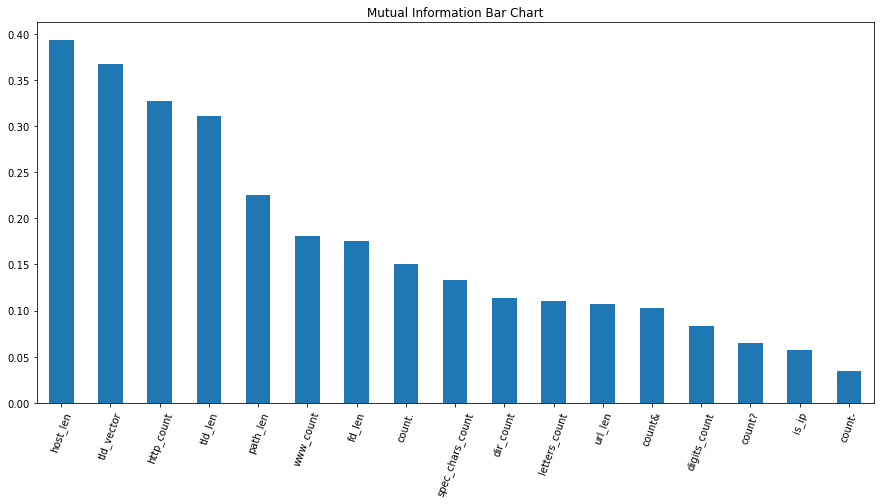

In [ ]:
plt.figure(figsize=(15,7))
mutual_info.plot.bar()
plt.title("Mutual Information Bar Chart")
plt.xticks(rotation = 70)
plt.show()

# Machine Learning Models: Training Testing

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#965023

##### Train-Test Splitting the data

In [ ]:
X = url_data.iloc[:, 3:]
y = url_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

##### Feature Scaling
- Standardization 
- Normalization

In [ ]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

mm = MinMaxScaler()
X_train_nml = mm.fit_transform(X_train)
X_test_nml = mm.transform(X_test)

### LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=1000)

print("-> fit start")
lr.fit(X_train_nml, y_train)
print("-> fit complete")

print("-> prediction start")
y_pred = lr.predict(X_test_nml)
print("-> prediction complete")

lr_accuracy_score = accuracy_score(y_test, y_pred)
lr_precision_score = precision_score(y_test, y_pred, average='weighted')
lr_recall_score = recall_score(y_test, y_pred, average='weighted')
lr_f1_score = 2 * (lr_precision_score * lr_recall_score) / (lr_precision_score + lr_recall_score)

lr_rms_error = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nAccuracy score with LogisticRegression:", lr_accuracy_score)
print("Precision score with LogisticRegression:", lr_precision_score)
print("Recall score with LogisticRegression:", lr_recall_score)
print("F1 score with LogisticRegression:", lr_f1_score)
print("\nconfusion Matrix: ", confusion_matrix(y_test, y_pred), sep="\n")
print("RMS Error:", lr_rms_error)

-> fit start
-> fit complete
-> prediction start
-> prediction complete
Accuracy score with LogisticRegression: 0.8528701153779216
Precision score with LogisticRegression: 0.8395767216471466
Recall score with LogisticRegression: 0.8528701153779216
F1 score with LogisticRegression: 0.846171211756902

confusion Matrix: 
[[124793   1336    171   2433]
 [  1327  25820    323   1222]
 [   822   1524   4906   2447]
 [ 13272   3433    433  11096]]
RMS Error: 0.9364774083897649


### KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier( n_neighbors=1, n_jobs=-1, weights='distance')

print("-> fit start")
knn.fit(X_train_nml, y_train)
print("-> fit complete")

print("-> prediction start")
y_pred= knn.predict(X_test_nml)
print("-> prediction complete")

knn_accuracy_score = accuracy_score(y_test, y_pred)
knn_precision_score = precision_score(y_test, y_pred, average='weighted')
knn_recall_score = recall_score(y_test, y_pred, average='weighted')
knn_f1_score = 2 * (knn_precision_score * knn_recall_score) / (knn_precision_score + knn_recall_score)

knn_rms_error = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nAccuracy score with KNeighborsClassifier:", knn_accuracy_score)
print("Precision score with KNeighborsClassifier:", knn_precision_score)
print("Recall score with KNeighborsClassifier:", knn_recall_score)
print("F1 score with KNeighborsClassifier:", knn_f1_score)
print("\nconfusion Matrix: ", confusion_matrix(y_test, y_pred), sep="\n")
print("RMS Error:", knn_rms_error)

-> fit start
-> fit complete
-> prediction start
-> prediction complete

Accuracy score with KNeighborsClassifier: 0.9510744376989937
Precision score with KNeighborsClassifier: 0.950802268176922
Recall score with KNeighborsClassifier: 0.9510744376989937
F1 score with KNeighborsClassifier: 0.950938333463444

confusion Matrix: 
[[124932     39     75   3687]
 [    36  28307     50    299]
 [    55     71   9176    397]
 [  3546    741    562  23385]]
RMS Error: 0.6025672204767119


### GaussianNB

In [ ]:
nb = GaussianNB()

print("-> fit start")
nb.fit(X_train_std, y_train)
print("-> fit complete")

print("-> prediction start")
y_pred= nb.predict(X_test_std)
print("-> prediction complete")

nb_accuracy_score = accuracy_score(y_test, y_pred)
nb_precision_score = precision_score(y_test, y_pred, average='weighted')
nb_recall_score = recall_score(y_test, y_pred, average='weighted')
nb_f1_score = 2 * (nb_precision_score * nb_recall_score) / (nb_precision_score + nb_recall_score)

nb_rms_error = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nAccuracy score with GaussianNB:", nb_accuracy_score)
print("Precision score with GaussianNB:", nb_precision_score)
print("Recall score with GaussianNB:", nb_recall_score)
print("F1 score with GaussianNB:", nb_f1_score)
print("\nconfusion Matrix: ", confusion_matrix(y_test, y_pred), sep="\n")
print("RMS Error:", nb_rms_error)

-> fit start
-> fit complete
-> prediction start
-> prediction complete

Accuracy score with GaussianNB: 0.786320498776605
Precision score with GaussianNB: 0.7609214095643261
Recall score with GaussianNB: 0.786320498776605
F1 score with GaussianNB: 0.7734124820080535

confusion Matrix: 
[[119434   8078    368    853]
 [    60  28566     41     25]
 [   458   4440   4740     61]
 [ 20960   6201    199    874]]
RMS Error: 1.1023726144526722


### DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

print("-> fit start")
dt.fit(X_train_nml, y_train)
print("-> fit complete")

print("-> prediction start")
y_pred= dt.predict(X_test_nml)
print("-> prediction complete")

dt_accuracy_score = accuracy_score(y_test, y_pred)
dt_precision_score = precision_score(y_test, y_pred, average='weighted')
dt_recall_score = recall_score(y_test, y_pred, average='weighted')
dt_f1_score = 2 * (dt_precision_score * dt_recall_score) / (dt_precision_score + dt_recall_score)

dt_rms_error = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nAccuracy score with DesicionTreeClassifier:", dt_accuracy_score)
print("Precision score with DesicionTreeClassifier:", dt_precision_score)
print("Recall score with DesicionTreeClassifier:", dt_recall_score)
print("F1 score with DesicionTreeClassifier:", dt_f1_score)
print("\nconfusion Matrix: ", confusion_matrix(y_test, y_pred), sep="\n")
print("RMS Error:", dt_rms_error)

-> fit start
-> fit complete
-> prediction start
-> prediction complete

Accuracy score with DesicionTreeClassifier: 0.9563672846773615
Precision score with DesicionTreeClassifier: 0.9558238490440104
Recall score with DesicionTreeClassifier: 0.9563672846773615
F1 score with DesicionTreeClassifier: 0.9560954896397736

confusion Matrix: 
[[125929     35     60   2709]
 [    40  28143     89    420]
 [    59     76   9114    450]
 [  3676    601    309  23648]]
RMS Error: 0.5679856735026977


### RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 700)

print("-> fit start")
rf.fit(X_train_nml, y_train)
print("-> fit complete")

print("-> prediction start")
y_pred= rf.predict(X_test_nml)
print("-> prediction complete")

rf_accuracy_score = accuracy_score(y_test, y_pred)
rf_precision_score = precision_score(y_test, y_pred, average='weighted')
rf_recall_score = recall_score(y_test, y_pred, average='weighted')
rf_f1_score = 2 * (rf_precision_score * rf_recall_score) / (rf_precision_score + rf_recall_score)

rf_rms_error = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nAccuracy score with RandomForestClassifier:", rf_accuracy_score)
print("Precision score with RandomForestClassifier:", rf_precision_score)
print("Recall score with RandomForestClassifier:", rf_recall_score)
print("F1 score with RandomForestClassifier:", rf_f1_score)
print("\nconfusion Matrix: ", confusion_matrix(y_test, y_pred), sep="\n")
print("RMS Error:", rf_rms_error)

-> fit start
-> fit complete
-> prediction start
-> prediction complete

Accuracy score with RandomForestClassifier: 0.9651921088463231
Precision score with RandomForestClassifier: 0.9647421463643828
Recall score with RandomForestClassifier: 0.9651921088463231
F1 score with RandomForestClassifier: 0.9649670751511736

confusion Matrix: 
[[126652      9     23   2049]
 [    36  28487     12    157]
 [    57     71   9120    451]
 [  3327    531     77  24299]]
RMS Error: 0.5164797165598152


### Accuracy, Precision, Recall, F1_Score Comparison Graph

None


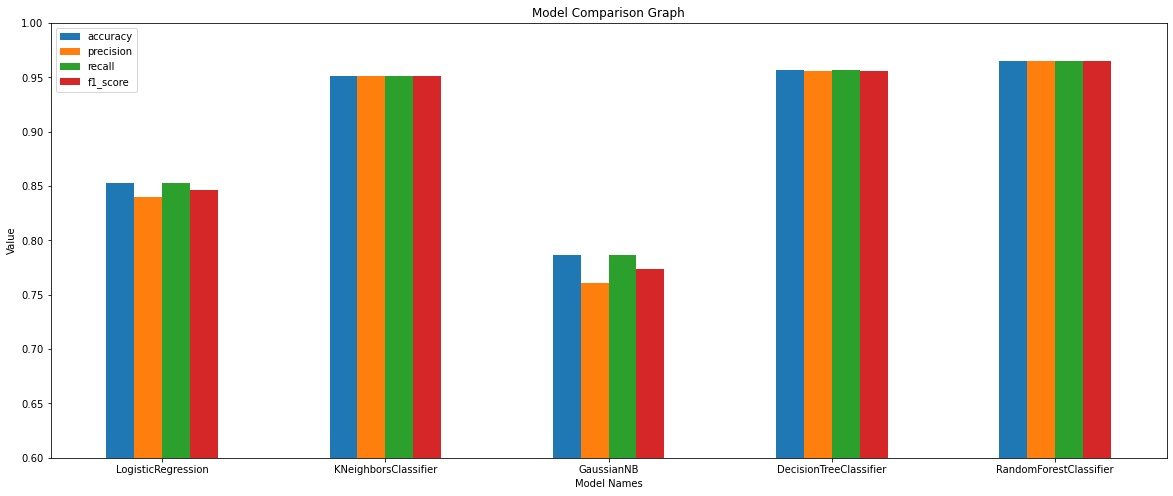

In [ ]:
modelData = pd.DataFrame({
    'model_name': ['LogisticRegression', 'KNeighborsClassifier', 'GaussianNB', 'DecisionTreeClassifier', 'RandomForestClassifier'],
    'accuracy': [lr_accuracy_score,knn_accuracy_score, nb_accuracy_score, dt_accuracy_score, rf_accuracy_score],
    'precision': [lr_precision_score, knn_precision_score, nb_precision_score, dt_precision_score, rf_precision_score],
    'recall': [lr_recall_score, knn_recall_score, nb_recall_score, dt_recall_score, rf_recall_score],
    'f1_score': [lr_f1_score, knn_f1_score, nb_f1_score, dt_f1_score, rf_f1_score],
    'rms_error': [lr_rms_error, knn_rms_error, nb_rms_error, dt_rms_error, rf_rms_error]
})
print(modelData.set_index('model_name', inplace=True))

modelData.iloc[:, 0:-1].plot(kind='bar', figsize=(20,8))
plt.title('Model Comparison Graph')
plt.xlabel('Model Names')
plt.ylabel('Value')
plt.ylim(bottom = 0.6, top = 1.0)
plt.xticks(rotation=0)
plt.legend(loc="upper left")
plt.show()

### RMS Error Comparison Graph

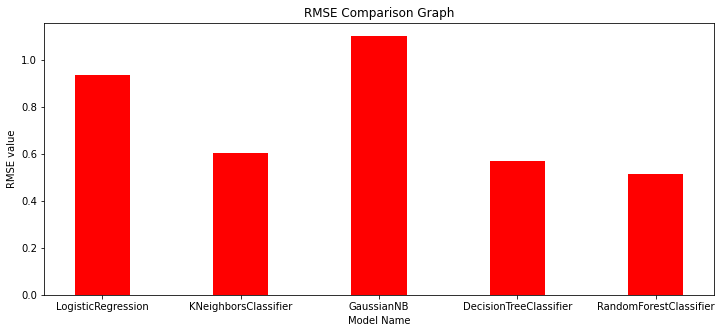

In [ ]:
plt.figure(figsize=(12, 5))
plt.bar(modelData.index.values, modelData['rms_error'].values, color=red_color, width = 0.4)
plt.title('RMSE Comparison Graph')
plt.xlabel('Model Name')
plt.ylabel('RMSE value')
plt.show()